# Homework exercises

In [2]:
# import Python libraries
import numpy as np # numpy is a scientific computing library
import matplotlib.pyplot as plt # matplotlib is a library for visualising results - usually through graphs/ plots

In [3]:
# define a function to solve the reaction-diffusion equation
# Dirichlet C=0 at x=0, Neumann BC dC/dx = 0 at x=Lj
def Solve(D, k, C0, Nx, tMax, L, thresholdSS): 
    # D is the diffusion coefficient, k is the degradation rate, v is the production rate, Nx is the number of spatial (x) points, tMax is the maximum time
    # L is the tissue size, sRatio is the fraction of the tissue that is source cells
    # Finally, thresholdSS defines the maximum fractional change in concentration per unit time that the code checks to determine whether we have reached steady state (SS)
    
    dx = L/(Nx - 1) # the spatial step
    # dt = 0.5 * (1 / (((2 * D) / (dx ** 2)) + k))
    dt = (1 / (((4 * D) / (dx ** 2)) + k)) # dt is found from a stability condition called von Neumann
    Nt = round((tMax / dt) + 1) # the maximum number of time points

    D *= dt / (dx ** 2) # find diffusion prefactor
    k *= dt # find degradation rate prefactor

    concPrev = np.zeros(Nx) # the concentration at the previous timestep
    concPrev[0] = C0
    tCount = 0
    flag = 0
    while flag == 0 and tCount < Nt:
        tCount += 1
        # print(tCount)
        concCurr = np.zeros(Nx) # initiate new array of concCurr

        concCurr[1:Nx - 1] = concPrev[1:Nx - 1] * (1 - k) + D*(concPrev[2:Nx] + concPrev[0:Nx - 2] - 2* concPrev[1:Nx - 1] )
        # boundary conditions - set dC/dx to 0 at the 0th index and (N-1)th index
        concCurr[0] = C0
        concCurr[Nx - 1] = concPrev[Nx - 1] * (1 - k) + D*(concPrev[Nx - 2] - concPrev[Nx - 1] )
        # check threshold for steady state
        dC = sum(abs(concCurr - concPrev)) / sum(concCurr)
        if dC < thresholdSS:
            flag = 1
            print("Steady state has been reached")
        # set the previous solution as the current solution ready for the loop
        concPrev = np.array(concCurr)

    return concCurr # return the final concentration

In [8]:
# define a plotting function
def plot(x,y,xlabel=None,ylabel=None,colour='black'):
  fig, ax = plt.subplots()
  fig.set_size_inches(12, 8, forward=True)
  plt.plot(x,y,linewidth=3,color=colour)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return fig, ax

In [4]:
# define parameters

# System parameters
D = 10 # diffusion coefficient, um/s
k = 0.05 # degradation rate /s
C0 = 5000 # mol/um^-3
Nx = 201 # number of grid points
concThr = 500
L = 100
# Simulation parameters
tMax = 100000 # maximum time to ruNx simulation
thresholdSS = 1E-08 # threshold for steady state

Steady state has been reached


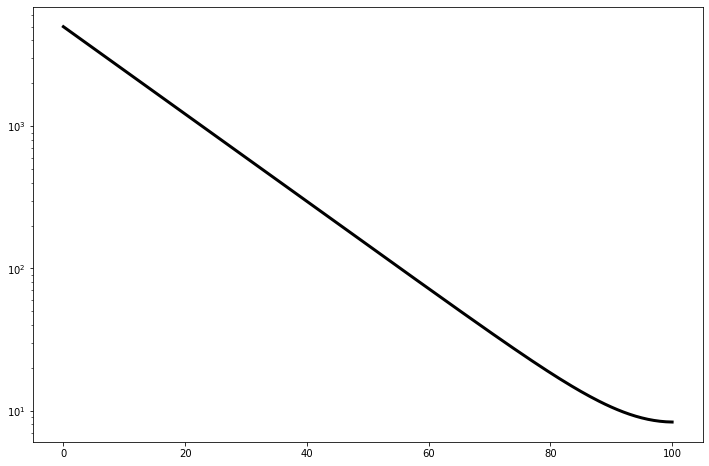

In [11]:
concCurr = Solve(D, k, C0, Nx, tMax, L, thresholdSS) # find the numerical steady state solution using the solver
x = np.linspace(0,L,Nx)
lam = np.sqrt(D/k)
C_ana = C0*np.exp(-x/lam)
fig, ax = plot(x,concCurr)
ax.set_yscale('log')

In [5]:
# Can define a function to do this in the general case
def findCThresh(pos, x, conc, Nx):

    # Find indexes corresponding to positions above and below pos
    xInd = [i for i, val in enumerate(x) if val > pos]
    xInd = xInd[0]

    # Use linear interpolation to find concentration at position
    m = (conc[xInd] - conc[xInd - 1]) / (x[xInd] - x[xInd - 1])
    return conc[xInd - 1] + (m * (pos - x[xInd - 1]))

# Define a function to extract the position corresponding to a concentration threshold (inverse of above)
def findXThresh(cThresh, x, conc, Nx):

    # Find indexes corresponding to positions above and below pos
    cInd = [i for i, val in enumerate(conc) if val < cThresh]
    cInd = cInd[0]

    # Use linear interpolation to find concentration at position
    m = (conc[cInd] - conc[cInd - 1]) / (x[cInd] - x[cInd - 1])
    c = conc[cInd - 1] - (m * x[cInd - 1])
    return (cThresh - c) / m

Steady state has been reached
xThr= 32.56662648241425


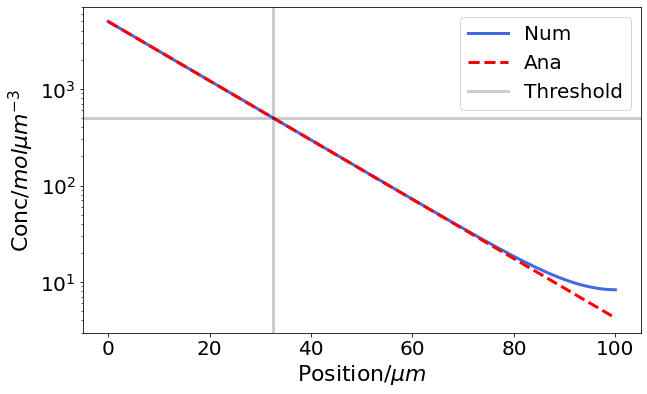

In [243]:
# %%%%%%%%%%%%% EXERCISE 1 %%%%%%%%%%%%%
concCurr = Solve(D, k, C0, Nx, tMax, L, thresholdSS)
x = np.linspace(0,L,Nx)
lam = np.sqrt(D/k)
C_ana = C0*np.exp(-x/lam)
 
# find xThr
xThr = extractPositionThreshold(Nx,L,concCurr,concThr)
print("xThr=",xThr)
plt.plot(x,concCurr,color='royalblue',label='Num',linewidth='3')
plt.yscale('log')
plt.plot(x,C_ana,linestyle='--',color='red',label='Ana',linewidth='3')
plt.axhline(concThr,alpha=0.2,linewidth='3',color='black')
plt.axvline(xThr,alpha=0.2,label='Threshold',linewidth='3',color='black')
plt.xlabel('Position/$\mu m$')
plt.ylabel('Conc/$mol \mu m^{-3}$')
plt.legend()

# Exercise 2

Steady state has been reached
Steady state has been reached
xThr= 32.56662648241425 29.410813500546737 35.146274328554405


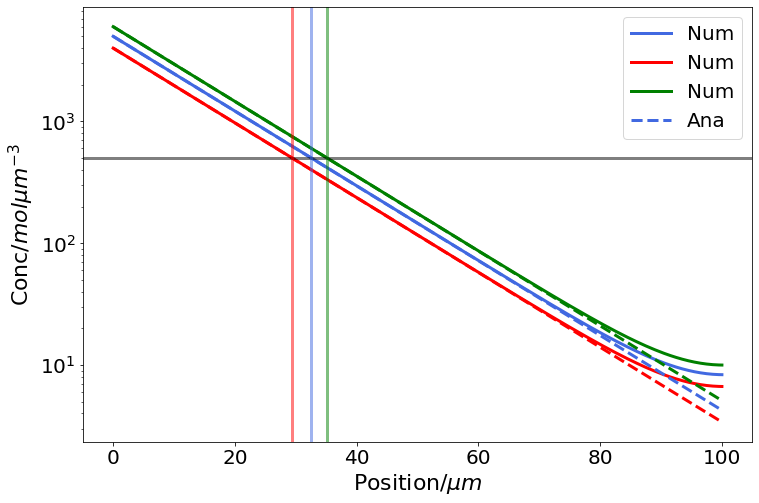

In [250]:
# %%%%%%%%%%%%% EXERCISE 2 %%%%%%%%%%%%%
C0_s = C0*0.8
C0_l = C0*1.2
concCurr_s = Solve(D, k, C0_s, Nx, tMax, L, thresholdSS)
concCurr_l = Solve(D, k, C0_l, Nx, tMax, L, thresholdSS)

x = np.linspace(0,L,Nx)
lam = np.sqrt(D/k)
C_ana_s = C0_s*np.exp(-x/lam)
C_ana_l = C0_l*np.exp(-x/lam)

 
# find xThr
xThr = extractPositionThreshold(Nx,L,concCurr,concThr)
xThr_s = extractPositionThreshold(Nx,L,concCurr_s,concThr)
xThr_l = extractPositionThreshold(Nx,L,concCurr_l,concThr)

print("xThr=",xThr,xThr_s,xThr_l)
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
plt.plot(x,concCurr,color='royalblue',label='Num',linewidth='3')
plt.plot(x,concCurr_s,color='red',label='Num',linewidth='3')
plt.plot(x,concCurr_l,color='green',label='Num',linewidth='3')

plt.yscale('log')
plt.plot(x,C_ana,linestyle='--',color='royalblue',label='Ana',linewidth='3')
plt.plot(x,C_ana_s,linestyle='--',color='red',linewidth='3')
plt.plot(x,C_ana_l,linestyle='--',color='green',linewidth='3')

plt.axhline(concThr,alpha=0.5,color='black',linewidth='3')
plt.axvline(xThr,alpha=0.5,color='royalblue',linewidth='3')
plt.axvline(xThr_s,alpha=0.5,color='red',linewidth='3')
plt.axvline(xThr_l,alpha=0.5,color='green',linewidth='3')

plt.xlabel('Position/$\mu m$')
plt.ylabel('Conc/$mol \mu m^{-3}$')
plt.legend()

In [202]:
r = (L-xThr)/xThr
r_s = (L-xThr_s)/xThr_s
r_l = (L-xThr_l)/xThr_l
print(r,r_s,r_l)
error_s = (r_s-r)/r
error_l = (r_l-r)/r
print(error_s*100,error_l*100)

0.41001066123544905 0.47736517880093066 0.3587234011718018
16.42750394892859 -12.50876255488281


# Exercise 3

In [206]:
# define a function to solve the reaction-diffusion equation
# Dirichlet C=0 at x=0, Neumann BC dC/dx = 0 at x=Lj
def SolveDeg(D, k0, C0, Nx, tMax, L, thresholdSS): 
    # D is the diffusion coefficient, k is the degradation rate, v is the production rate, Nx is the number of spatial (x) points, tMax is the maximum time
    # L is the tissue size, sRatio is the fraction of the tissue that is source cells
    # Finally, thresholdSS defines the maximum fractional change in concentration per unit time that the code checks to determine whether we have reached steady state (SS)
    
    dx = L/(Nx - 1) # the spatial step
    # dt = 0.5 * (1 / (((2 * D) / (dx ** 2)) + k))
    dt = (1 / (((4 * D) / (dx ** 2)) + k0*C0)) # dt is found from a stability condition called von Neumann
    Nt = round((tMax / dt) + 1) # the maximum number of time points

    D *= dt / (dx ** 2) # find diffusion prefactor
    k0 *= dt # find degradation rate prefactor

    concPrev = np.zeros(Nx) # the concentration at the previous timestep
    concPrev[0] = C0
    tCount = 0
    flag = 0
    while flag == 0 and tCount < Nt:
        tCount += 1
        # print(tCount)
        concCurr = np.zeros(Nx) # initiate new array of concCurr

        concCurr[1:Nx - 1] = concPrev[1:Nx - 1] * (1 - k0*concPrev[1:Nx - 1]) + D*(concPrev[2:Nx] + concPrev[0:Nx - 2] - 2* concPrev[1:Nx - 1] )
        # boundary conditions - set dC/dx to 0 at the 0th index and (N-1)th index
        concCurr[0] = C0
        concCurr[Nx - 1] = concPrev[Nx - 1] * (1 - k0*concPrev[Nx - 1]) + D*(concPrev[Nx - 2] - concPrev[Nx - 1] )
        # check threshold for steady state
        dC = sum(abs(concCurr - concPrev)) / sum(concCurr)
        if dC < thresholdSS:
            flag = 1
            print("Steady state has been reached")
        # set the previous solution as the current solution ready for the loop
        concPrev = np.array(concCurr)

    return concCurr # return the final concentration

In [207]:
# %%%%%%%%%%%%% EXERCISE 2 %%%%%%%%%%%%%
k0 = 0.00005 # degradation rate prefactor
concThr = 500
# Simulation parameters
tMax = 100000 # maximum time to ruNx simulation
thresholdSS = 1E-08 # threshold for steady state
conc_ex3 = SolveDeg(D, k0, C0, Nx, tMax, L, thresholdSS)

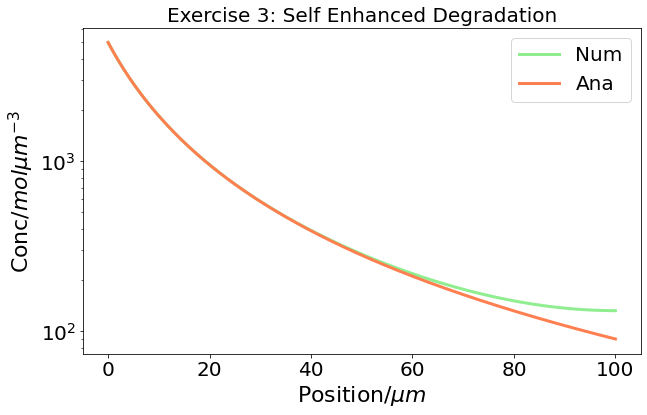

In [252]:
A = 6*D/k0
epsilon = np.sqrt(6*D/(k0*C0))
conc_ex3ana = A/((x+epsilon)**2)

xThr = extractPositionThreshold(Nx,L,concCurr,concThr)

plt.plot(x,conc_ex3,linewidth='3',color='lightgreen',label='Num')
plt.plot(x,conc_ex3ana,linewidth='3',color='coral',label='Ana')
plt.yscale('log')
plt.xlabel('Position/$\mu m$')
plt.ylabel('Conc/$mol \mu m^{-3}$')
plt.title('Exercise 3: Self Enhanced Degradation')
plt.legend()

In [214]:
conc_ex3s = SolveDeg(D, k0, C0*0.8, Nx, tMax, L, thresholdSS)
conc_ex3l = SolveDeg(D, k0, C0*1.2, Nx, tMax, L, thresholdSS)

Steady state has been reached
Steady state has been reached


33.56981086888708 31.735408542728 34.925311073467526


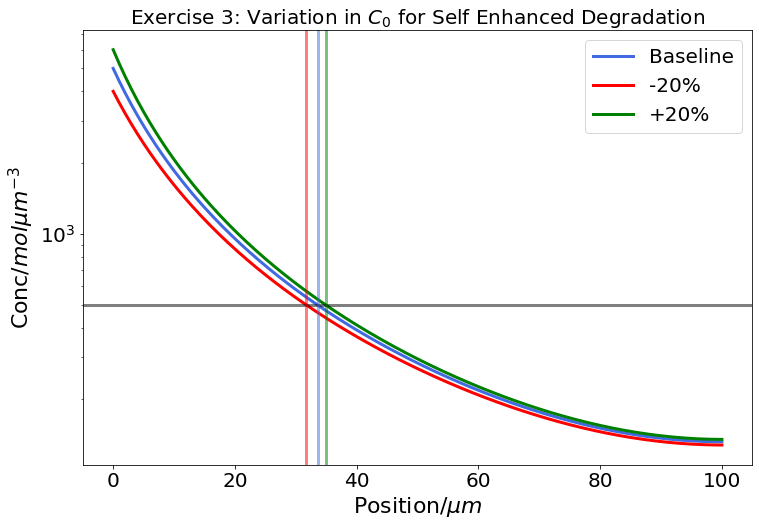

In [260]:
xThr = extractPositionThreshold(Nx,L,conc_ex3,concThr)
xThr_s = extractPositionThreshold(Nx,L,conc_ex3s,concThr)
xThr_l = extractPositionThreshold(Nx,L,conc_ex3l,concThr)
print(xThr,xThr_s,xThr_l)
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
plt.plot(x,conc_ex3,color='royalblue',linewidth='3',label='Baseline')
plt.plot(x,conc_ex3s,color='red',linewidth='3',label='-20%')
plt.plot(x,conc_ex3l,color='green',linewidth='3',label='+20%')

# plt.plot(x,conc_ex3ana,linewidth='3')

plt.axhline(concThr,alpha=0.5,color='black',linewidth='3')
plt.axvline(xThr,alpha=0.5,color='royalblue',linewidth='3')
plt.axvline(xThr_s,alpha=0.5,color='red',linewidth='3')
plt.axvline(xThr_l,alpha=0.5,color='green',linewidth='3')
plt.yscale('log')
plt.xlabel('Position/$\mu m$')
plt.ylabel('Conc/$mol \mu m^{-3}$')
plt.title('Exercise 3: Variation in $C_0$ for Self Enhanced Degradation')
plt.legend()

In [218]:
r = (L-xThr)/xThr
r_s = (L-xThr_s)/xThr_s
r_l = (L-xThr_l)/xThr_l
print(r,r_s,r_l)
error_s = (r_s-r)/r
error_l = (r_l-r)/r
print(error_s*100,error_l*100)

1.9788669465719642 2.1510544401960905 1.8632529511231521
8.701317383789274 -5.842434007455263


# Exercise 4

In [224]:
np.linspace(0.5,1.5,11)[5]

1.0

In [225]:
D = 10
k = 0.05
C0 = 5000
k0 = 0.00005
concThr = 500
C0_values = C0*np.linspace(0.5,1.5,11)
xThr_values = []
xThr_values_deg = []
for i in range(len(C0_values)):
    C0_val = C0_values[i]
    # solve
    conc = Solve(D, k, C0_val, Nx, tMax, L, thresholdSS)
    xThr = extractPositionThreshold(Nx,L,conc,concThr)
    xThr_values = np.append(xThr_values,xThr)
    # solvedeg
    conc_deg = SolveDeg(D, k0, C0_val, Nx, tMax, L, thresholdSS)
    xThr_deg = extractPositionThreshold(Nx,L,conc_deg,concThr)
    xThr_values_deg = np.append(xThr_values_deg,xThr_deg)

err_values = (xThr_values-xThr_values[5])/xThr_values[5]
err_values_deg = (xThr_values_deg-xThr_values_deg[5])/xThr_values_deg[5]


Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached


Text(0.5, 1.0, 'Exercise 4: Positional error vs variation in $C_0$')

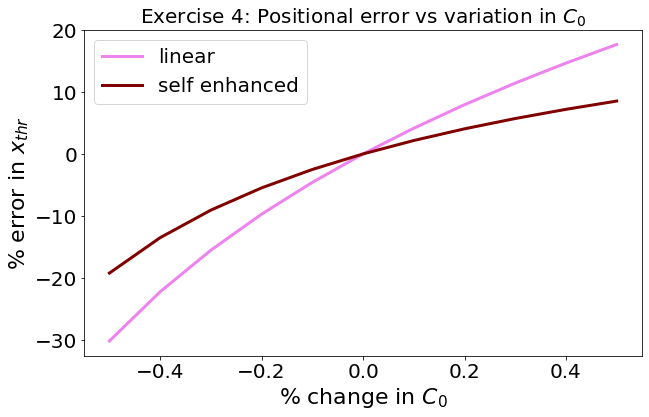

In [261]:
plt.plot(np.linspace(0.5,1.5,11)-1,err_values*100,label='linear',color='violet',linewidth='3')
plt.plot(np.linspace(0.5,1.5,11)-1,err_values_deg*100,label='self enhanced',color='maroon',linewidth='3')
plt.legend()
plt.xlabel('% change in $C_0$')
plt.ylabel('% error in $x_{thr}$')
plt.title('Exercise 4: Positional error vs variation in $C_0$')

# Old exercises

Conc threshold =  33.69814764470449


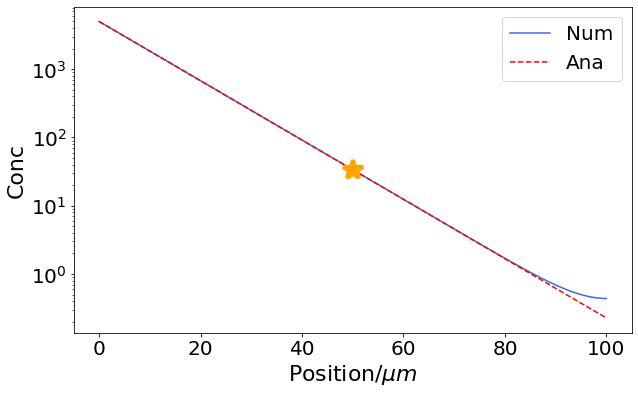

In [63]:
# would write Fate 1 and Fate 2 as cases
fig, ax = plt.subplots()
fig.set_size_inches(10, 6, forward=True)
plt.plot(x,concCurr,color='royalblue',label='Num')
plt.yscale('log')
plt.plot(x,C_ana,linestyle='--',color='red',label='Ana')
plt.xlabel('Position/$\mu m$')
plt.ylabel('Conc')
plt.legend()
plt.plot(x[int(Nx/2)],concCurr[int(Nx/2)],marker='*',markersize='20',markeredgewidth='4',color='orange')
concThr = concCurr[int(Nx/2)]
print("Conc threshold = ",concThr)

# Exercise 3

In [57]:
def extractConcThresholds(Nx,conc,fractions_L=[0.25,0.5,0.75]):
    index_fractions = [int(Nx*i) for i in fractions_L]
    return conc[index_fractions]



def extractPositionThresholds(Nx,L,conc,concThresholds):
    x = np.linspace(0,L,Nx)
    backwards_x = np.flip(x)
    backwards_conc = np.flip(conc)
    positionThresholds = np.zeros(len(concThresholds))
    for i in range(len(concThresholds)):
        post_index = np.searchsorted(backwards_conc,concThresholds[i])
        if post_index == Nx: # if C_thr > than even C[0]
            positionThresholds[i] = 0
        elif post_index == 0:
            positionThresholds[i] = L
        else:
            concStep = backwards_conc[post_index] - backwards_conc[post_index - 1] # difference in concentration
            xStep = backwards_x[post_index - 1]- backwards_x[post_index]
            concError = backwards_conc[post_index] - concThresholds[i] # the error in concentration from the index before the threshold, the overshoot
            xError = xStep*concError/concStep
            positionThresholds[i] = backwards_x[post_index] + xError

    return positionThresholds

Steady state has been reached
50.01844647996391
0.33349732221090733


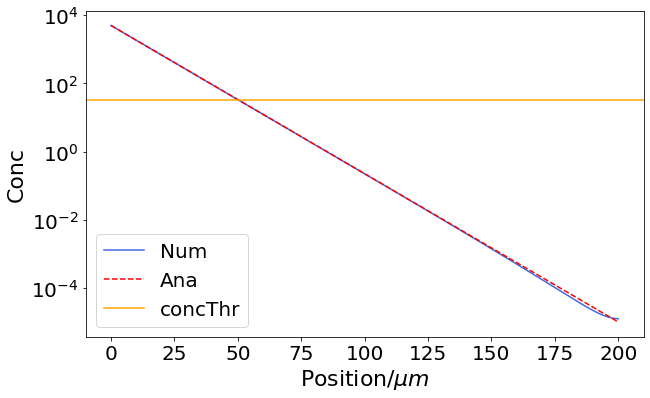

In [67]:
L = 200
concCurr_2 = Solve(D, k, C0, Nx, tMax, L, thresholdSS)
x = np.linspace(0,L,Nx)
lam = np.sqrt(D/k)
C_ana = C0*np.exp(-x/lam)

plt.plot(x,concCurr_2,color='royalblue',label='Num')
plt.yscale('log')
plt.plot(x,C_ana,linestyle='--',color='red',label='Ana')
plt.xlabel('Position/$\mu m$')
plt.ylabel('Conc')
plt.axhline(concThr,color='orange',label='concThr')
plt.legend()
xThr = extractPositionThreshold(Nx,L,concCurr_2,concThr)
print(xThr)
ratio = xThr/(L-xThr)
print(xThr/(L-xThr))

# Exercise 4

Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached


Text(0, 0.5, 'Position of boundaries $\\mu m$')

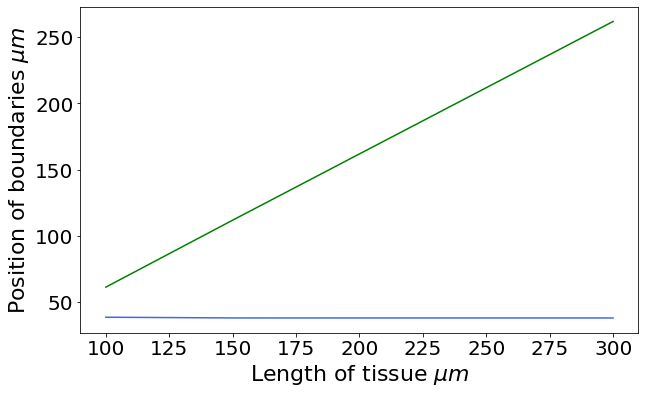

In [76]:
# define parameters
D = 10 # diffusion coefficient, um/s
k = 0.01 # degradation rate 0.01/s
C0 = 5000
Nx = 201 # number of grid points
tMax = 10000 # maximum time to ruNx simulation
thresholdSS = 1E-08 # threshold for steady state
concThr_2 = 1500
Lvalues = np.linspace(100,300,5)
l1Array = []
l2Array = []
for L in Lvalues:
    concCurr_3 = Solve(D, k, C0, Nx, tMax, L, thresholdSS)
    l1 = extractPositionThreshold(Nx,L,concCurr_3,concThr_2)
    l2 = L-l1
    l1Array = np.append(l1Array,l1)
    l2Array = np.append(l2Array,l2)


plt.plot(Lvalues,l1Array,color='royalblue',label='$l_1$')
plt.plot(Lvalues,l2Array,color='green',label='$l_2$')

# plt.yscale('log')
# plt.plot(x,C_ana,linestyle='--',color='red',label='Ana')
plt.xlabel('Length of tissue $\mu m$')
plt.ylabel('Position of boundaries $\mu m$')
# plt.legend()

# Exercise 5

Steady state has been reached


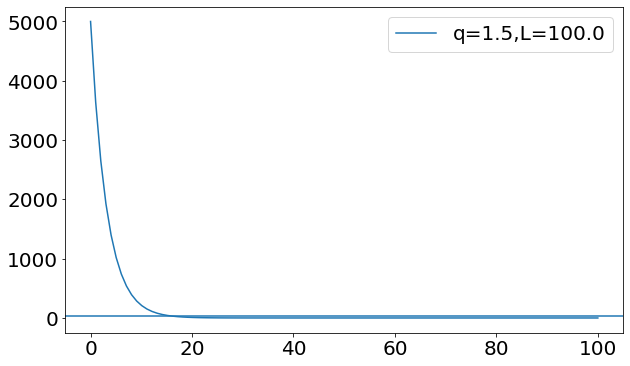

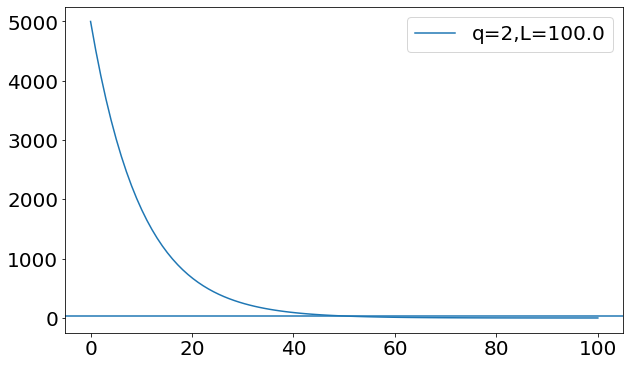

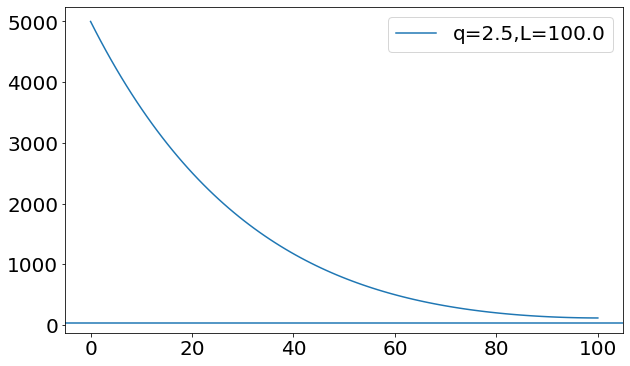

Steady state has been reached


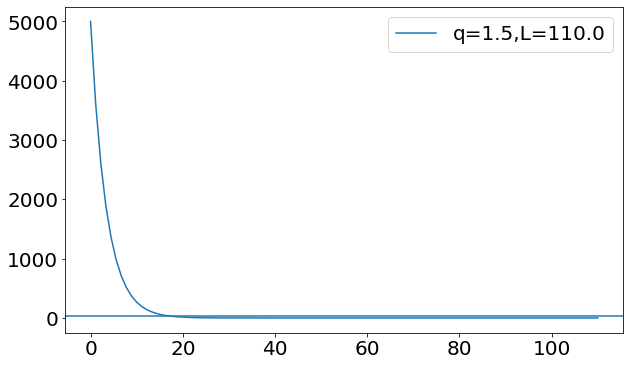

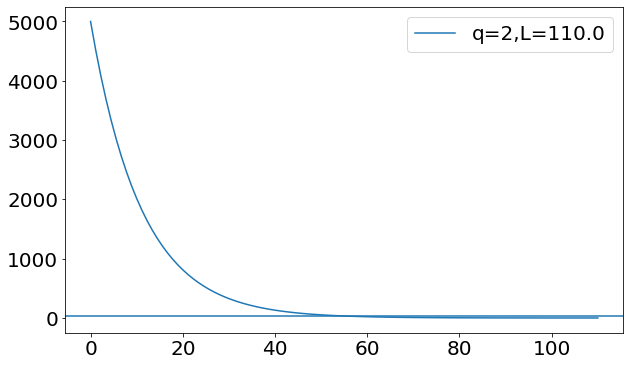

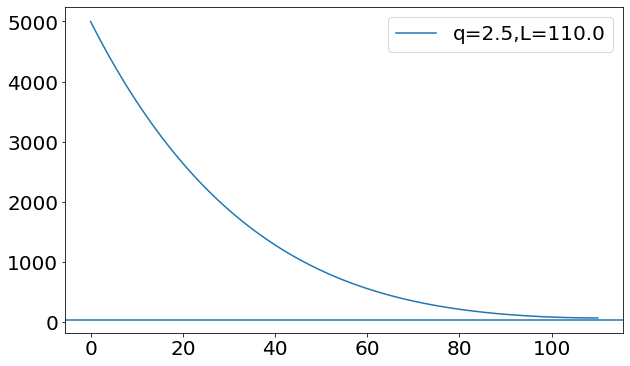

Steady state has been reached


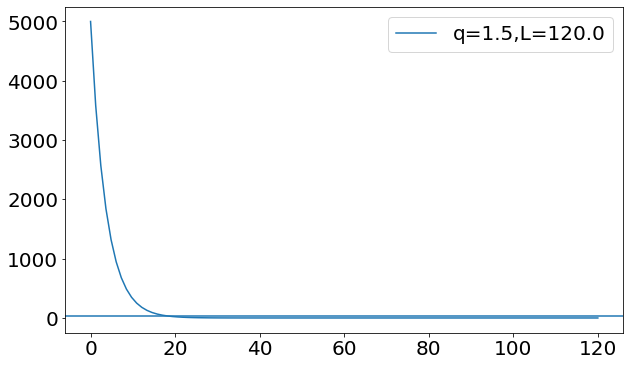

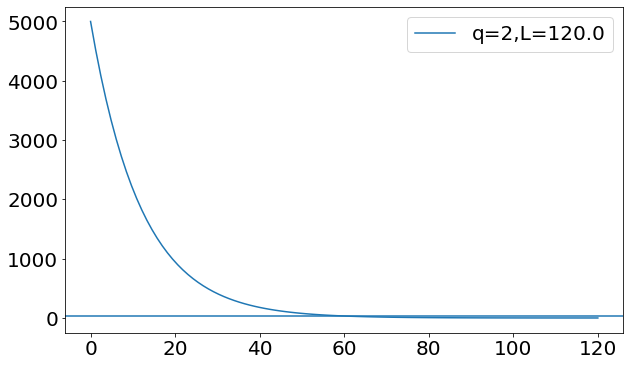

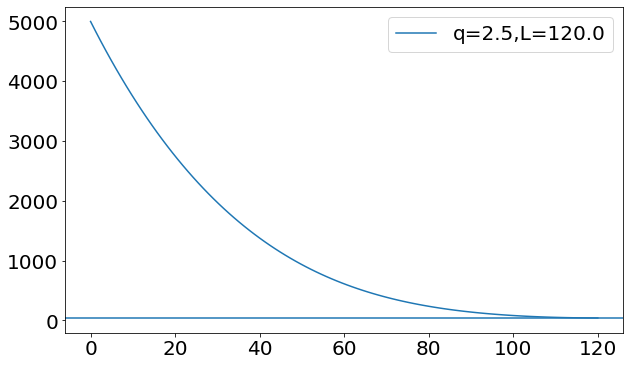

Steady state has been reached


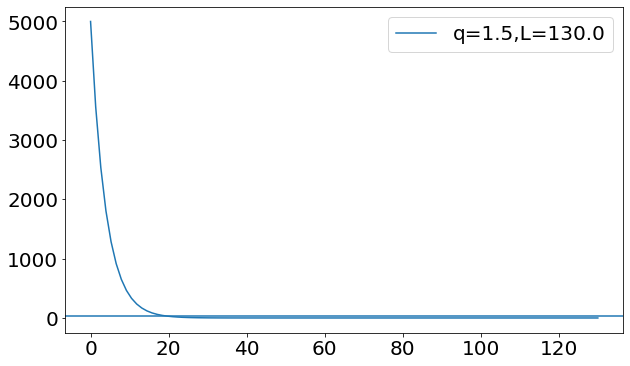

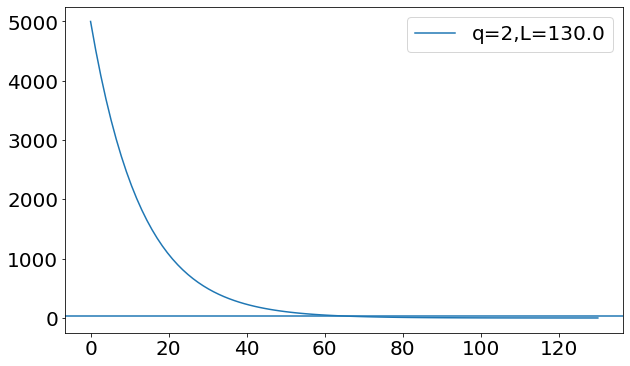

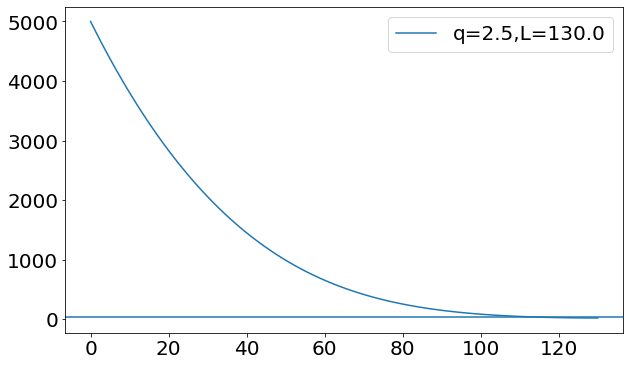

Steady state has been reached


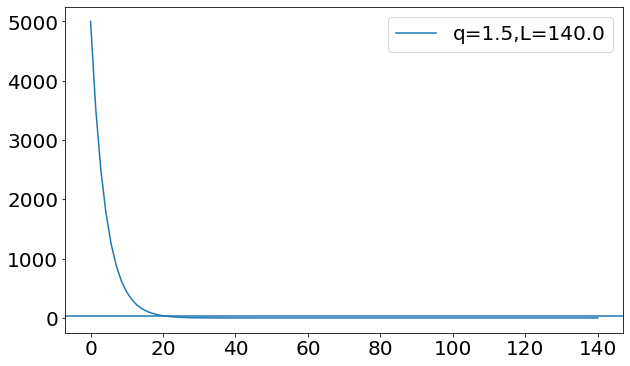

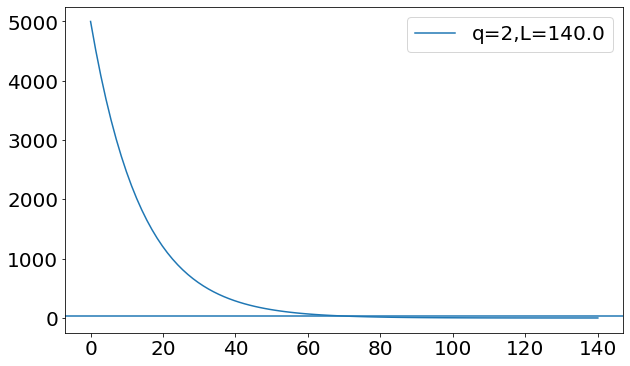

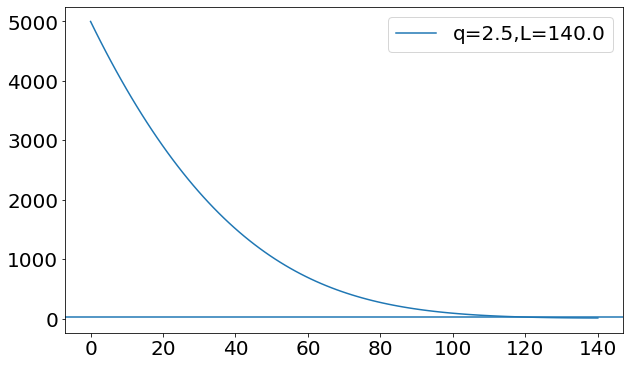

Steady state has been reached


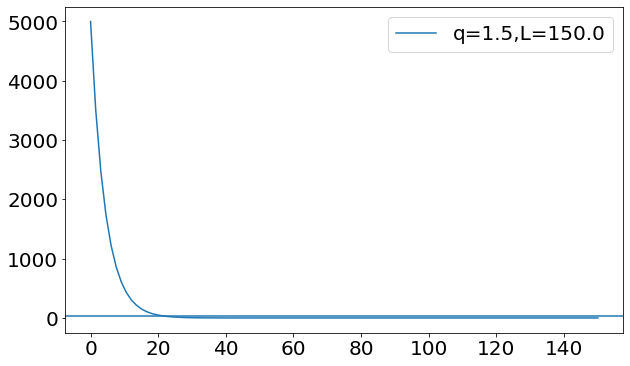

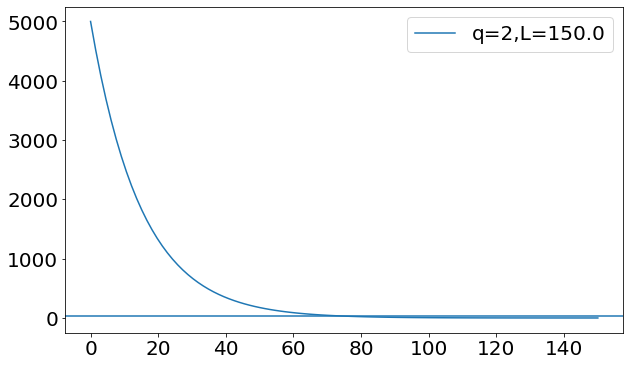

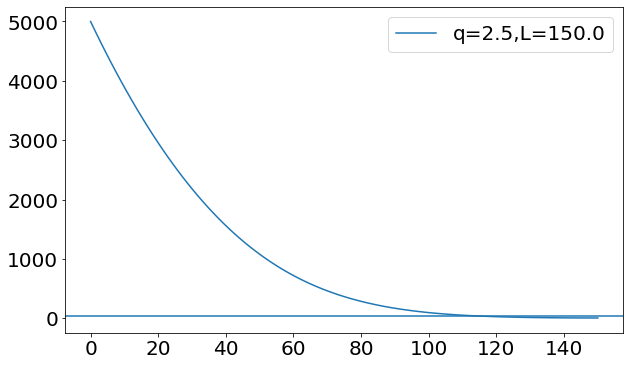

In [169]:
a = 10
Nx = 100
qValues = [1.5,2,2.5]
D = 0.1
C0 = 5000
concThr_ex5 = 1000
Lvalues_ex5 = np.linspace(100,150,6)
l1values_ex5 = np.zeros([len(Lvalues_ex5),len(qValues)]) # [Lvalue,qvalue]
l2values_ex5 = np.zeros([len(Lvalues_ex5),len(qValues)])


for i in range(len(Lvalues_ex5)):
    L = Lvalues_ex5[i]
    for j in range(len(qValues)):
        q = qValues[j]
        k = a*((L)**(-q))
        concCurr = Solve(D, k, C0, Nx, tMax, L, thresholdSS)
        x = np.linspace(0,L,Nx)
        plt.plot(x,concCurr,label=f'q={q},L={L}')
        plt.axhline(concThr)
        plt.legend()
        # plt.yscale('log')
        plt.show()
        l1 = extractPositionThreshold(Nx,L,concCurr,concThr_ex5)
        l1values_ex5[i,j] = l1
        l2values_ex5[i,j] = L-l1


In [130]:
l1values_ex5[:,j]/l2values_ex5[:,j]

array([0.35486844, 0.34246407, 0.32733732, 0.31099996, 0.29452854,
       0.27853503])

In [ ]:
for j in range(len(qValues)):
    # ax[j].plot(Lvalues_ex5,l1values_ex5[:,j],color=colours[j],label=f'l1, q={qValues[j]:.2g}')
    # ax[j].plot(Lvalues_ex5,l2values_ex5[:,j],color=colours[j],label=f'l2, q={qValues[j]:.2g}',linestyle='--')
    ax[j].plot(Lvalues_ex5,l2values_ex5[:,j]/l1values_ex5[:,j],color=colours[j],label=f'$l_1/l_2$, q={qValues[j]:.2g}')
    ax[j].set_ylabel('Ratio between size of regimes')
    ax[j].legend()

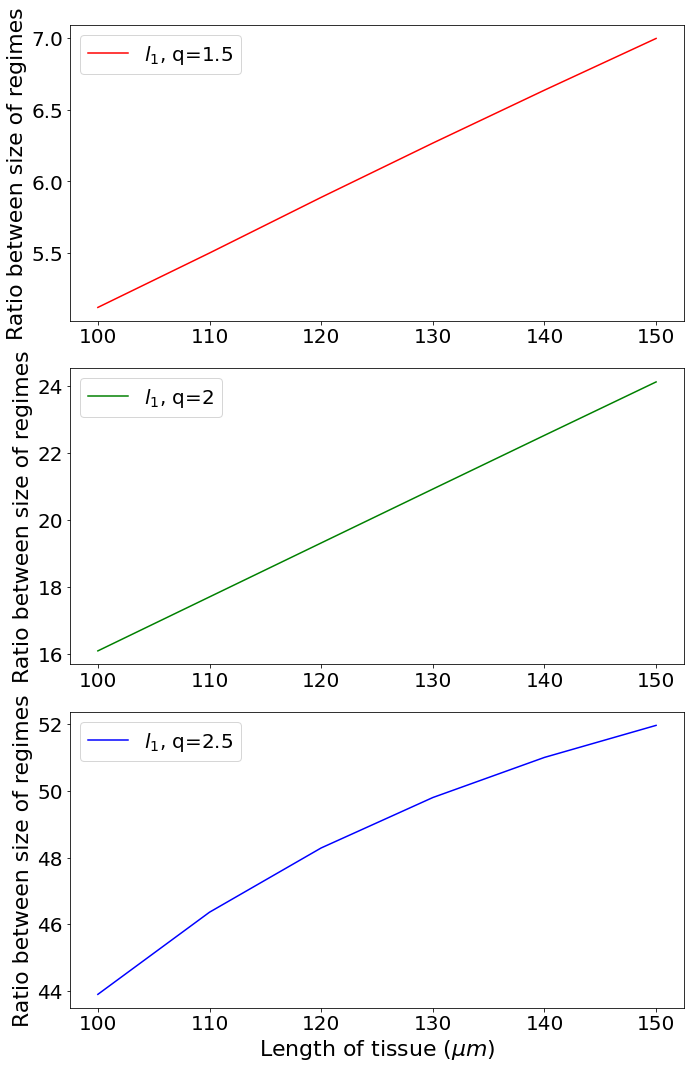

In [171]:
colours = ['red','green','blue']
fig, ax = plt.subplots(3,1)
fig.set_size_inches(10, 15, forward=True)

for j in range(len(qValues)):
    ax[j].plot(Lvalues_ex5,l1values_ex5[:,j],color=colours[j],label=f'$l_1$, q={qValues[j]:.2g}')

    # ax[j].plot(Lvalues_ex5,l2values_ex5[:,j],color=colours[j],label=f'l2, q={qValues[j]:.2g}',linestyle='--')
    # ax[j].plot(Lvalues_ex5,l2values_ex5[:,j]/l1values_ex5[:,j],color=colours[j],label=f'$l_2/l_1$, q={qValues[j]:.2g}')
    ax[j].set_ylabel('Ratio between size of regimes')
    ax[j].legend()
    # ax[j].set_yscale('log') 

plt.xlabel('Length of tissue ($\mu m$)')


plt.tight_layout()
# plt.yscale('log')

# extra

In [ ]:
# define function to solve
def SolveDegPower(D, k, v, Nx, tMax, L, sRatio, thresholdSS, degPower = 1):
    dx = L/(Nx - 1) # space step
    w = round(L * sRatio/dx)+1 # the index for the edge of the source
    # dt = 0.5 * (1 / (((2 * D) / (dx ** 2)) + k))
    m = 2/(degPower-1)
    A = (m*(m+1)*D/k)**(1/(degPower-1))
    x_b = (m*A*D/v)**((degPower-1)/(degPower+1))
    C_max = A/(x_b**m)
    dt = (1 / (((4 * D) / (dx ** 2)) + k*degPower*C_max))
    Nt = round((tMax / dt) + 1)

    D *= dt / (dx ** 2) # find diffusion prefactor
    k *= dt # find degradation rate prefactor
    v *= dt # find production rate prefactor

    concPrev = np.zeros(Nx)
    tCount = 0
    flag = 0
    while flag == 0 and tCount < Nt:
        tCount += 1
        concCurr = np.zeros(Nx) # initiate new array of concCurr
        # in source
        concCurr[1:w] = concPrev[1:w] - k*(concPrev[1:w]**degPower) + v + D*(concPrev[0:w-1] + concPrev[2:w+1] -2* concPrev[1:w] )
        # out of source
        concCurr[w:Nx - 1] = concPrev[w:Nx - 1] - k*(concPrev[w:Nx - 1]**degPower) + D*(concPrev[w+1:Nx] + concPrev[w-1:Nx - 2] - 2* concPrev[w:Nx - 1] )
        # boundary conditions - set dC/dx to 0 at the 0th index and (N-1)th index
        concCurr[0] = concPrev[0] - k*(concPrev[0]**degPower) + v + D * (concPrev[1] - concPrev[0] )
        concCurr[Nx - 1] = concPrev[Nx - 1] - k*(concPrev[Nx - 1]**degPower) + D*(concPrev[Nx - 2] - concPrev[Nx - 1] )
        # check threshold for steady state
        dC = sum(abs(concCurr - concPrev)) / sum(concCurr)
        if dC < thresholdSS:
            flag = 1
            print("Steady state has been reached")
        # set the previous solution as the current solution ready for the loop
        concPrev = np.array(concCurr)

    return concCurr # return the final concentration

In [ ]:
concCurr = Solve(D, k, v, Nx, tMax, L, sRatio, thresholdSS)
concCurr_1 = SolveDegPower(D, k, v, Nx, tMax, L, sRatio, thresholdSS, degPower = 2)

Steady state has been reached
Steady state has been reached


In [ ]:
concThresholds = extractConcThresholds(Nx,concCurr)
positionThresholds = extractPositionThresholds(Nx,L,sRatio,concCurr,concThresholds)
positionThresholds

array([25., 50., 75.])

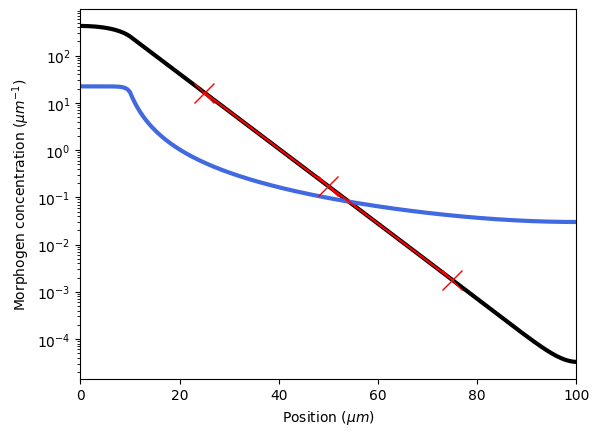

In [ ]:
# solve and plot
x = np.linspace(0,L,Nx)
plt.plot(x,concCurr,color='black',linewidth='3')
plt.plot(x,concCurr_1,color='royalblue',linewidth='3')

plt.xlabel('Position ($\mu m$)')
plt.ylabel('Morphogen concentration ($\mu m^{-1}$)')
plt.xlim(0,L)
# plt.ylim(ymax=1.05*max(concCurr))
plt.plot(positionThresholds,concThresholds,marker='x',markersize='15',color='red')
plt.yscale('log')

In [ ]:
# different morphogen production rates for exponential case
# define reference concentration thresholds
vRef = 10
concRef = Solve(D, k, vRef, Nx, tMax, L, sRatio, thresholdSS)
concThresholds = extractConcThresholds(Nx,concRef)
positionThresholdsRef = extractPositionThresholds(Nx,L,sRatio,concRef,concThresholds)
vValues = vRef*np.array([0.5,1,2,4])
positionThresholdsArray_v = np.zeros([len(vValues),len(concThresholds)])
errorPositionArray_v = np.zeros([len(vValues),len(concThresholds)])
for i in range(len(vValues)):
    conc = Solve(D, k, vValues[i], Nx, tMax, L, sRatio, thresholdSS)
    positionThresholdsCurr = extractPositionThresholds(Nx,L,sRatio,conc,concThresholds)
    positionThresholdsArray_v[i,:] = positionThresholdsCurr
    errorPositionArray_v[i,:] = positionThresholdsCurr - positionThresholdsRef

print(errorPositionArray_v)
# print(positionThresholdsArray[:])

Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
[[-3.79226097 -3.79049538 -3.77088044]
 [ 0.          0.          0.        ]
 [ 3.8031994   3.80055818  3.77543332]
 [ 7.5989113   7.5920691   7.53496196]]


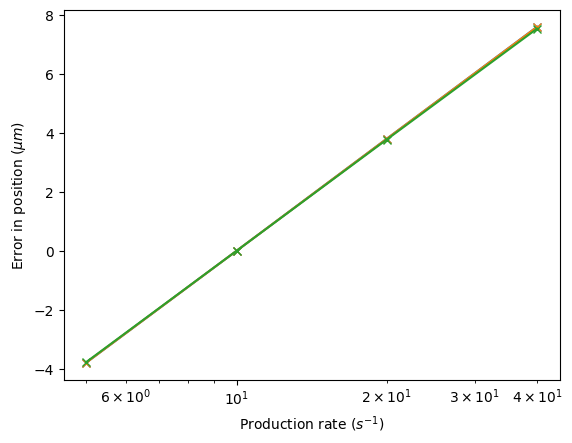

In [ ]:
colors = ['red','green','blue']
for i in range(len(concThresholds)):
    plt.plot(vValues,(errorPositionArray_v[:,i]),marker='x')
plt.xlabel('Production rate ($s^{-1}$)')
plt.ylabel('Error in position ($\mu m$)')
plt.xscale('log')

Text(0, 0.5, 'Error in position')

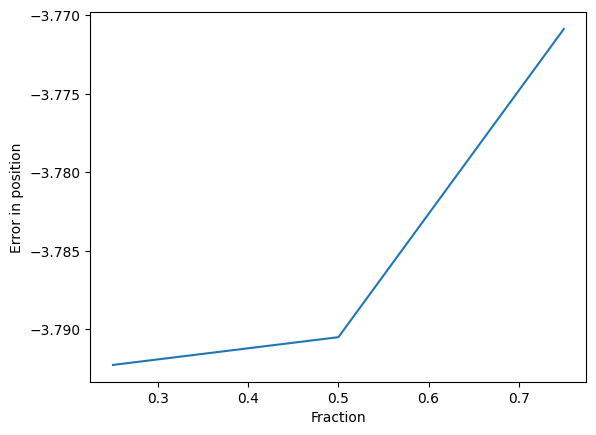

In [ ]:
plt.plot([0.25,0.5,0.75],errorPositionArray_v[0,:])
plt.xlabel('Fraction')
plt.ylabel('Error in position')
# plt.yscale('log')

In [ ]:
# different morphogen production rates for exponential case
# define reference concentration thresholds
vRef = 10
concRef = SolveDegPower(D, k, vRef, Nx, tMax, L, sRatio, thresholdSS, degPower = 2)
concThresholds = extractConcThresholds(Nx,concRef)
positionThresholdsRef = extractPositionThresholds(Nx,L,sRatio,concRef,concThresholds)
# vValues = vRef*np.array([0.25,1,4,64])
positionThresholdsArrayDegPower_v = np.zeros([len(vValues),len(concThresholds)])
errorPositionArrayDegPower_v = np.zeros([len(vValues),len(concThresholds)])
for i in range(len(vValues)):
    conc = SolveDegPower(D, k, vValues[i], Nx, tMax, L, sRatio, thresholdSS, degPower = 2)
    positionThresholdsCurr = extractPositionThresholds(Nx,L,sRatio,conc,concThresholds)
    positionThresholdsArrayDegPower_v[i,:] = positionThresholdsCurr
    errorPositionArrayDegPower_v[i,:] = positionThresholdsCurr - positionThresholdsRef

print(errorPositionArrayDegPower_v)
# print(positionThresholdsArray[:])

Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
[[-0.98401357 -0.98836938 -1.11750342]
 [ 0.          0.          0.        ]
 [ 0.83263732  0.83245955  0.93221726]
 [ 1.52649248  1.52802541  1.69377661]]


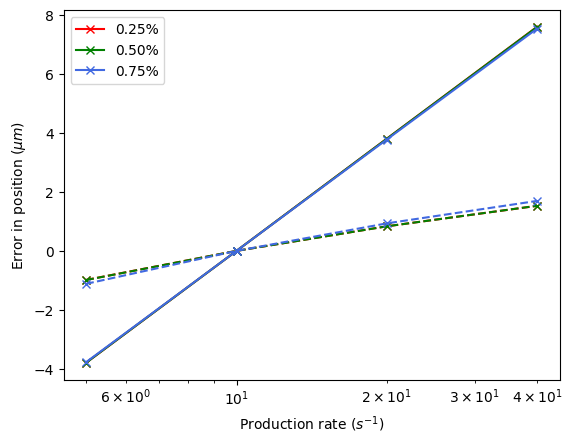

In [ ]:
colours = ['red','green','royalblue','orange']
fractions=[0.25,0.5,0.75]
for i in range(len(concThresholds)):
    plt.plot(vValues,(errorPositionArray_v[:,i]),marker='x',color=colours[i],label=f'{fractions[i]:.2f}%')
    plt.plot(vValues,(errorPositionArrayDegPower_v[:,i]),marker='x',color=colours[i],linestyle='--')

plt.xlabel('Production rate ($s^{-1}$)')
plt.ylabel('Error in position ($\mu m$)')
plt.xscale('log')
plt.legend()

In [ ]:
# scaling (vary L)
LRef = 100
concRef = Solve(D, k, v, Nx, tMax, LRef, sRatio, thresholdSS)
concThresholds = extractConcThresholds(Nx,concRef)
normPositionThresholdsRef = extractPositionThresholds(Nx,L,sRatio,concRef,concThresholds)/LRef
LValues = LRef*np.array([0.5,1,2,4])
normPositionThresholdsArray_L = np.zeros([len(LValues),len(concThresholds)])
errorPositionArray_L = np.zeros([len(LValues),len(concThresholds)])
concArray = np.zeros([len(LValues),Nx])
for i in range(len(LValues)):
    conc = Solve(D, k, v, Nx, tMax, LValues[i], sRatio, thresholdSS)
    concArray[i,:] = conc
    normPositionThresholdsCurr = extractPositionThresholds(Nx,LValues[i],sRatio,conc,concThresholds)/LValues[i]
    normPositionThresholdsArray_L[i,:] = normPositionThresholdsCurr
    errorPositionArray_L[i,:] = normPositionThresholdsCurr - normPositionThresholdsRef

print(errorPositionArray_L)

Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
[[ 0.1325046   0.39704529  0.25      ]
 [ 0.          0.          0.        ]
 [-0.07306433 -0.19791608 -0.32257439]
 [-0.1102894  -0.29728535 -0.48446424]]


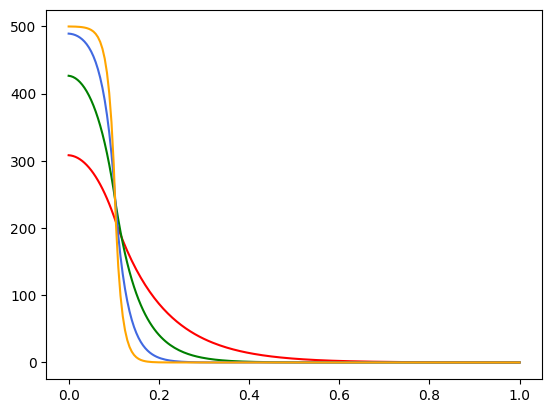

In [ ]:
r = np.linspace(0,1,Nx)
for i in range(len(LValues)):
    plt.plot(r,concArray[i,:],color=colours[i])

In [ ]:
# scaling (vary L)
LRef = 100
concRef = Solve(D, k, v, Nx, tMax, LRef, sRatio, thresholdSS)
concThresholds = extractConcThresholds(Nx,concRef)
normPositionThresholdsRef = extractPositionThresholds(Nx,L,sRatio,concRef,concThresholds)/LRef
LValues = LRef*np.array([0.5,1,2,4])
normPositionThresholdsArray_L = np.zeros([len(LValues),len(concThresholds)])
errorPositionArray_L = np.zeros([len(LValues),len(concThresholds)])
concArray = np.zeros([len(LValues),Nx])
for i in range(len(LValues)):
    conc = Solve(D, k*((LRef/LValues[i])**2), v, Nx, tMax, LValues[i], sRatio, thresholdSS)
    concArray[i,:] = conc
    normPositionThresholdsCurr = extractPositionThresholds(Nx,LValues[i],sRatio,conc,concThresholds)/LValues[i]
    normPositionThresholdsArray_L[i,:] = normPositionThresholdsCurr
    errorPositionArray_L[i,:] = normPositionThresholdsCurr - normPositionThresholdsRef

print(errorPositionArray_L)

Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
Steady state has been reached
[[-0.07592079 -0.07589282 -0.07556488]
 [ 0.          0.          0.        ]
 [ 0.07598911  0.07592069  0.07534962]
 [ 0.15195539  0.1517439   0.15124837]]


Text(0.5, 0, 'Position ($\\mu m$)')

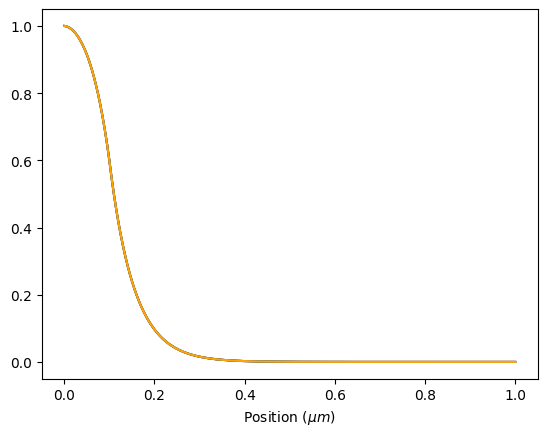

In [ ]:
r = np.linspace(0,1,Nx)
for i in range(len(LValues)):
    plt.plot(r,concArray[i,:]/max(concArray[i,:]),color=colours[i])

plt.xlabel('Position ($\mu m$)')

In [ ]:
# scaling (vary L)
LRef = 100
concRef = SolveDegPower(D, k, v, Nx, tMax, LRef, sRatio, thresholdSS,degPower=2)
concThresholds = extractConcThresholds(Nx,concRef)
normPositionThresholdsRef = extractPositionThresholds(Nx,L,sRatio,concRef,concThresholds)/LRef
LValues = LRef*np.array([0.5,1,2,4])
normPositionThresholdsArrayDegPower_L = np.zeros([len(LValues),len(concThresholds)])
errorPositionArrayDegPower_L = np.zeros([len(LValues),len(concThresholds)])
concArray = np.zeros([len(LValues),Nx])
for i in range(len(LValues)):
    conc = SolveDegPower(D, k, v, Nx, tMax, LValues[i], sRatio, thresholdSS, degPower=2)
    concArray[i,:] = conc
    normPositionThresholdsDegPowerCurr = extractPositionThresholds(Nx,LValues[i],sRatio,conc,concThresholds)/LValues[i]
    normPositionThresholdsArrayDegPower_L[i,:] = normPositionThresholdsCurr
    errorPositionArrayDegPower_L[i,:] = normPositionThresholdsCurr - normPositionThresholdsRef

print(errorPositionArrayDegPower_L)

23.207944168063893
Steady state has been reached
23.207944168063893
Steady state has been reached
23.207944168063893
Steady state has been reached
23.207944168063893
Steady state has been reached
23.207944168063893
Steady state has been reached
[[0.15195539 0.1517439  0.15124837]
 [0.15195539 0.1517439  0.15124837]
 [0.15195539 0.1517439  0.15124837]
 [0.15195539 0.1517439  0.15124837]]


22.334012890330765
22.36062781102895
22.360679774533487
22.360679774997894


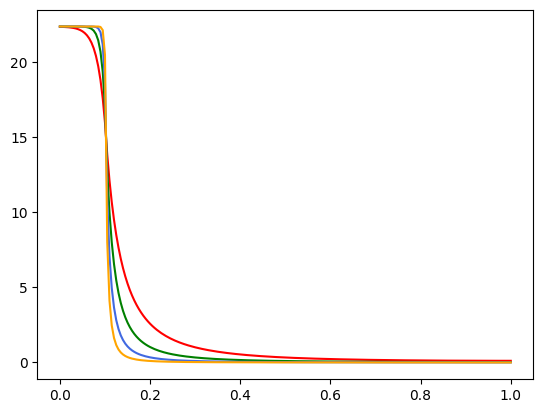

In [ ]:
r = np.linspace(0,1,Nx)
for i in range(len(LValues)):
    plt.plot(r,concArray[i,:],color=colours[i])